In [9]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import os
import json
%matplotlib inline

In [34]:

def plotVS(df1,df2,xlabel,ylabel):
    # Plot model vs model
    labels1 = df1[0].columns.values
    avarages1 = []
    errors1 = []
    c=['k','b','r','g']
    for label in labels1:
        average = np.mean([df[label] for df in df1], axis=0)
        avarages1.append(average)
        error = np.std([df[label] for df in df1], axis=0)
        errors1.append(error)
    labels2 = df2[0].columns.values
    avarages2 = []
    errors2 = []
    c=['k','b','r','g']
    for label in labels2:
        average = np.mean([df[label] for df in df2], axis=0)
        avarages2.append(average)
        error = np.std([df[label] for df in df2], axis=0)
        errors2.append(error)
    x = range(1, len(avarages1[0]) + 1)
    for i in range (len(avarages1)):
        plt.figure(figsize=(10, 6))
        plt.plot(x, avarages1[i], 'b-', label=xlabel)
        plt.plot(x, avarages2[i], 'r-', label=ylabel)
        plt.xlabel("Number of images")
        plt.ylabel("Seconds")
        plt.title("Browser VS Headless " + labels1[i] + " calculation times (S)")
        plt.legend()
        plt.grid(True)
        plt.show()
    
def plotDatasetTimes(df,xlabel,ylabel,title):
    
    labels = df[0].columns.values
    avarages = []
    errors = []
    c=['k','b','r','g']
    for label in labels:
        average = np.mean([df[label] for df in df], axis=0)
        avarages.append(average)
        error = np.std([df[label] for df in df], axis=0)
        errors.append(error)

    x = range(1, len(avarages[0]) + 1)
    # Plot all columns
    plt.figure(figsize=(10, 6))
    i = 0
    for column in df[0].columns:
        plt.errorbar(x, avarages[i], yerr=errors[i], fmt='o', capsize=5, mfc=c[i], mec=c[i], ecolor=c[i])
        # Connect the points with a line
        plt.plot(x, avarages[i], label=column, color=c[i])
        i += 1

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def getBrowserArrayTimes():
    browserTimesArray = []
    for i in range(1, 11):
        file_path = './data/resnet-wasm-browser (' + str(i) + ').json'
    
        with open(file_path) as file:
            data = json.load(file)
        
        RWB_Times = pd.DataFrame(data)
        RWB_Times_s = RWB_Times / 1000
        browserTimesArray.append(RWB_Times_s)
    
    return browserTimesArray

def getHeadlessArrayTimes():
    headlessTimesArray = []
    for i in range(1,11):
        file_path = './data/resnet-wasm-headless' + str(i) + '.json'
        with open(file_path) as file:
            data = json.load(file)
        RWB_Times = pd.DataFrame(data)
        RWB_Times_s = RWB_Times / 1000.0
        headlessTimesArray.append(RWB_Times_s)
    return headlessTimesArray

def getPythonArrayTimes():
    pythonTimesArray = []
    for i in range(1,11):
        file_path = './data/resnet-python' + str(i) + '.json'
        with open(file_path) as file:
            data = json.load(file)
        print(type(data))
        print(data)
        RWB_Times = pd.DataFrame(eval(data))
        RWB_Times_s = RWB_Times
        pythonTimesArray.append(RWB_Times_s)
    return pythonTimesArray

In [35]:
browserTimesArray = getBrowserArrayTimes()
headlessTimesArray = getHeadlessArrayTimes()
pythonTimesArray = getPythonArrayTimes()

<class 'str'>
[{"images": 0.0, "tensor": 7.365477085113525, "model": 1.9357259273529053, "total": 9.302181959152222}, {"images": 0.0, "tensor": 3.290794849395752, "model": 1.847348928451538, "total": 5.1391425132751465}, {"images": 0.0, "tensor": 3.2621617317199707, "model": 1.6987948417663574, "total": 4.960956573486328}, {"images": 0.0, "tensor": 3.2255728244781494, "model": 1.7257273197174072, "total": 4.951300144195557}, {"images": 0.0, "tensor": 3.2577648162841797, "model": 1.6956017017364502, "total": 4.954366445541382}, {"images": 0.0, "tensor": 3.2841179370880127, "model": 1.7351703643798828, "total": 5.0192883014678955}, {"images": 0.0, "tensor": 3.2407913208007812, "model": 1.7619032859802246, "total": 5.002694606781006}]
<class 'str'>
[{"images": 0.0, "tensor": 6.4371538162231445, "model": 1.759080171585083, "total": 8.197234153747559}, {"images": 0.0, "tensor": 5.594623327255249, "model": 3.084731340408325, "total": 8.679354667663574}, {"images": 0.0, "tensor": 3.2202386856

In [36]:
pythonTimesArray

[   images    tensor     model     total
 0     0.0  7.365477  1.935726  9.302182
 1     0.0  3.290795  1.847349  5.139143
 2     0.0  3.262162  1.698795  4.960957
 3     0.0  3.225573  1.725727  4.951300
 4     0.0  3.257765  1.695602  4.954366
 5     0.0  3.284118  1.735170  5.019288
 6     0.0  3.240791  1.761903  5.002695,
      images    tensor     model     total
 0  0.000000  6.437154  1.759080  8.197234
 1  0.000000  5.594623  3.084731  8.679355
 2  0.000000  3.220239  1.696788  4.917027
 3  0.001018  3.247472  1.689042  4.937532
 4  0.000000  3.251040  1.695920  4.946960
 5  0.000000  3.242656  1.697974  4.940630
 6  0.000000  3.187428  1.711828  4.899256,
    images    tensor     model     total
 0     0.0  6.349942  1.703884  8.054828
 1     0.0  3.233060  1.765392  4.999452
 2     0.0  3.260384  1.869165  5.129549
 3     0.0  3.260690  1.784590  5.045280
 4     0.0  3.320652  1.608993  4.930646
 5     0.0  3.223377  1.681782  4.905159
 6     0.0  3.252620  1.648202  4.90082

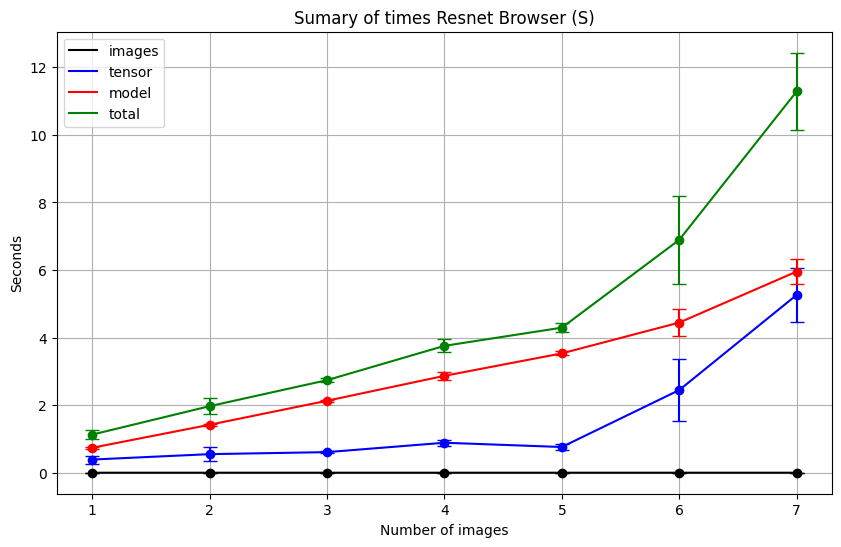

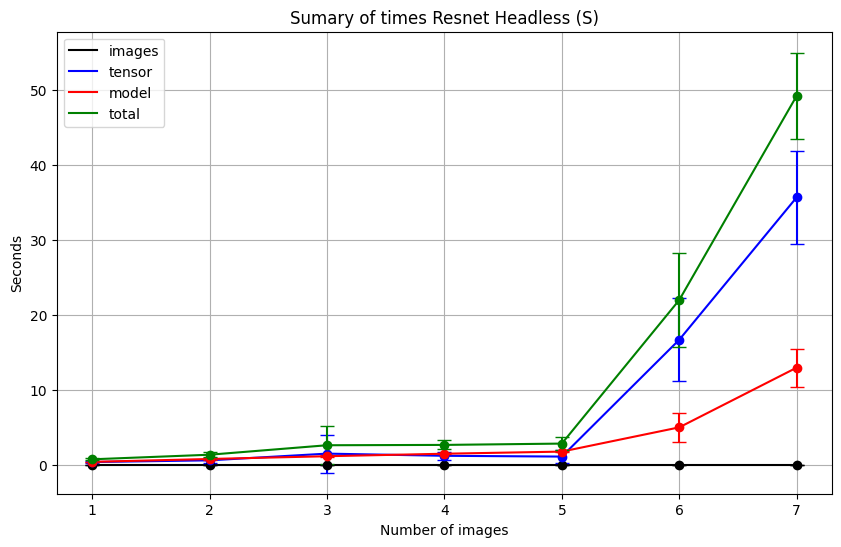

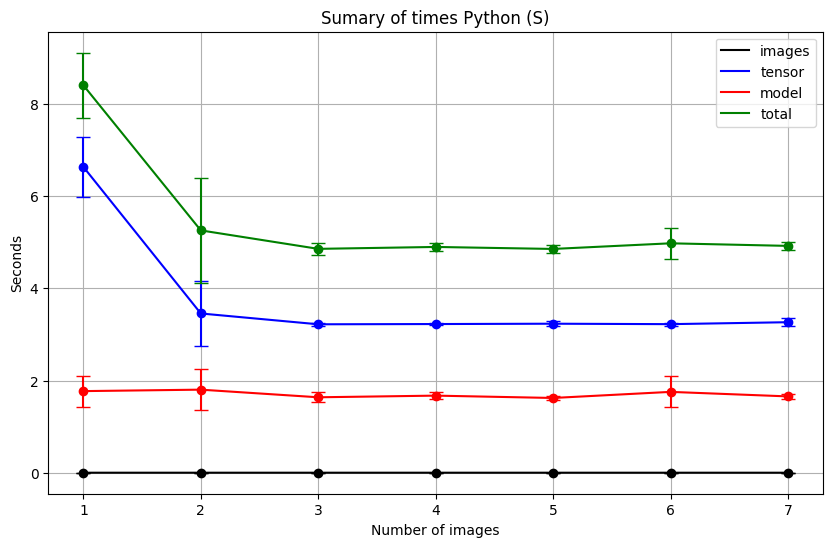

In [33]:
plotDatasetTimes(browserTimesArray,"Number of images", "Seconds", "Sumary of times Resnet Browser (S)")
plotDatasetTimes(headlessTimesArray,"Number of images", "Seconds", "Sumary of times Resnet Headless (S)")
plotDatasetTimes(pythonTimesArray,"Number of images", "Seconds", "Sumary of times Python (S)")

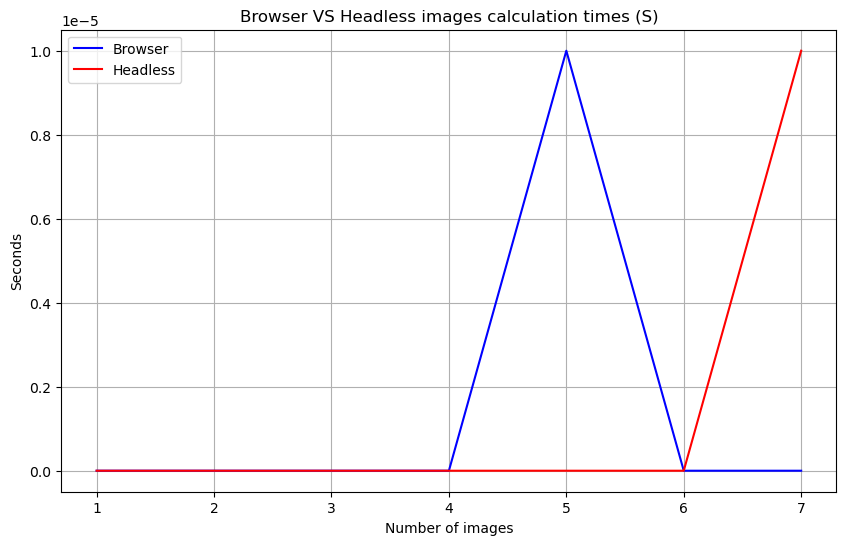

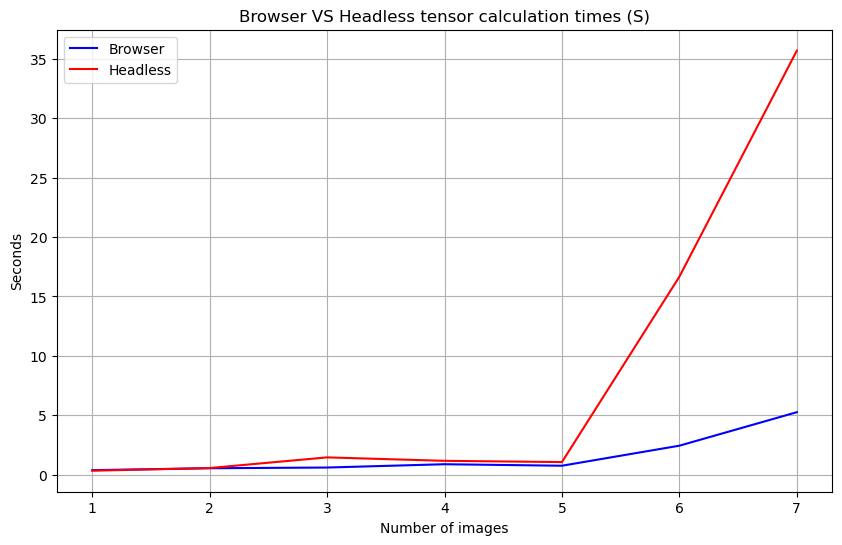

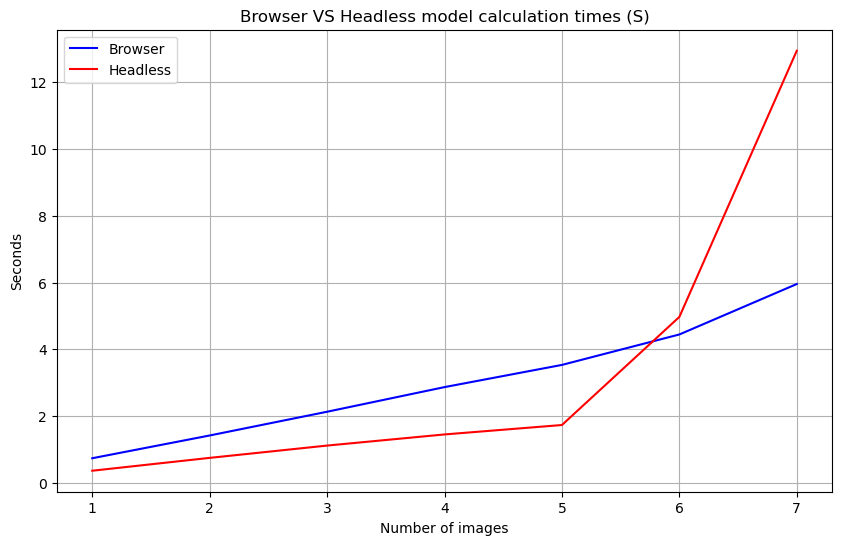

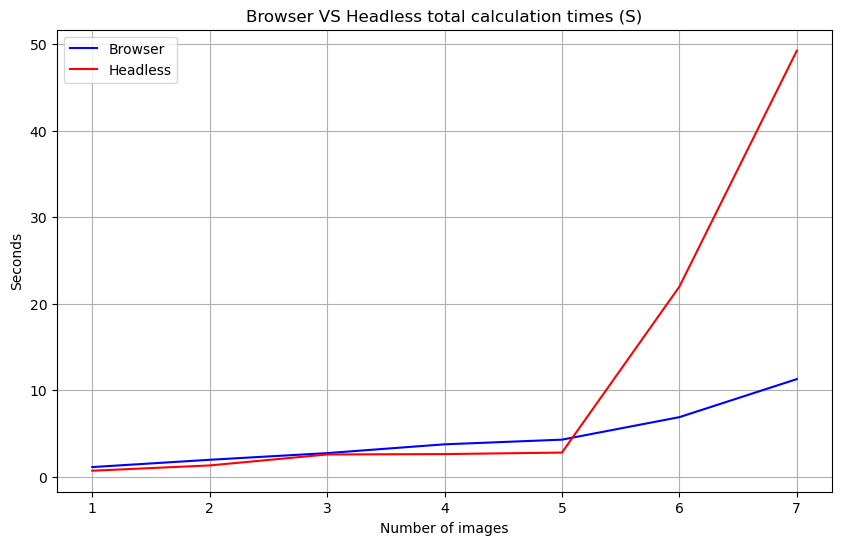

In [5]:
plotVS(browserTimesArray,headlessTimesArray,"Browser","Headless")

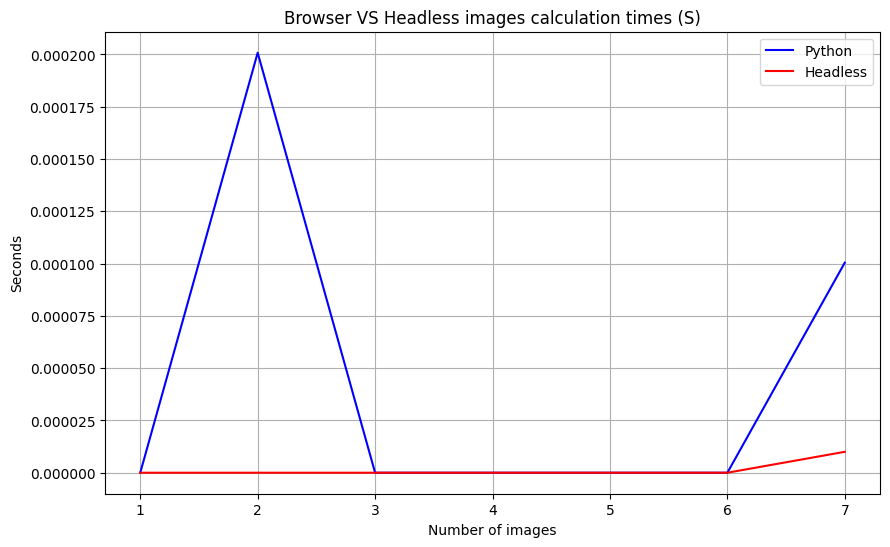

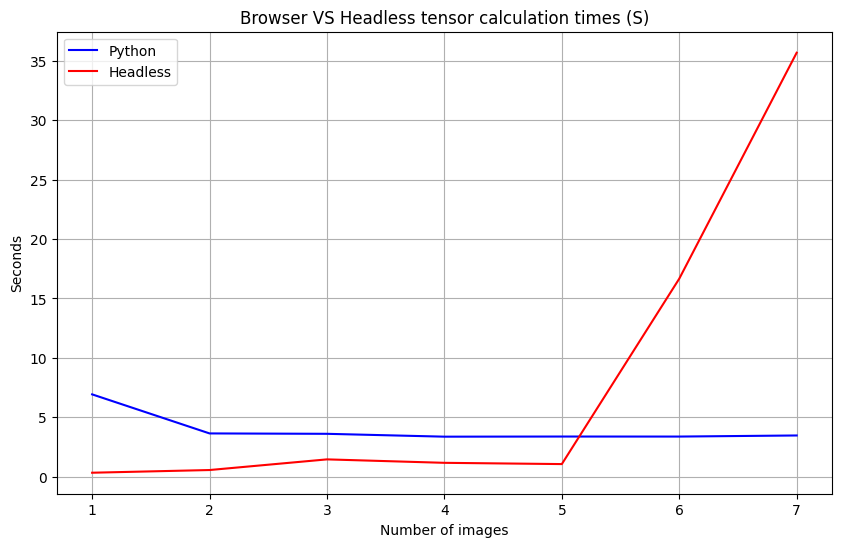

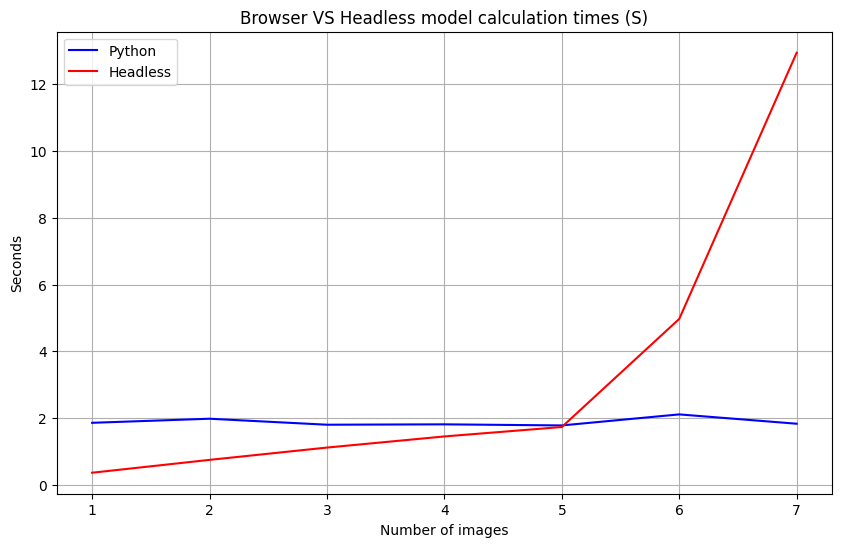

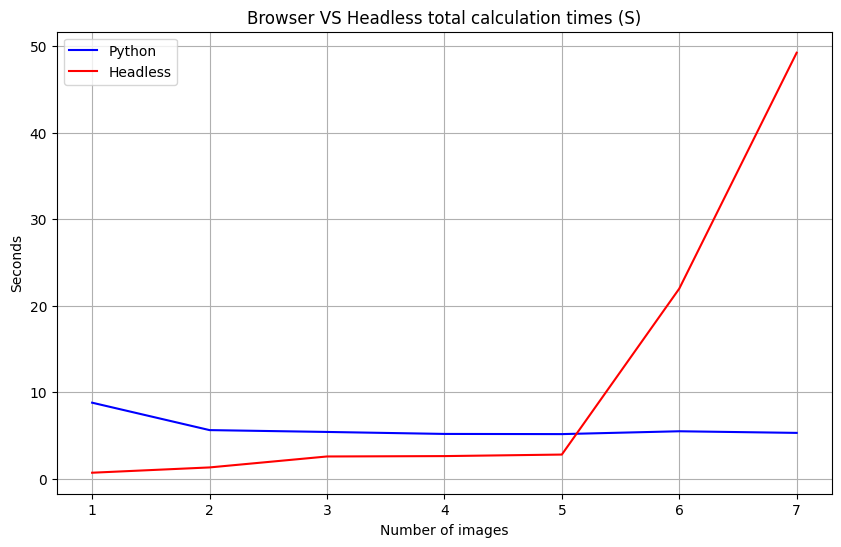

In [30]:
plotVS(pythonTimesArray,headlessTimesArray,"Python","Headless")